In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [66]:
# Uploading datasets i.e "Customers","Transaction","Product Heirarchy"
Customers = pd.read_table("E:Datasets/Customer.csv",sep=",")
Transaction = pd.read_table("E:Datasets/Transactions.csv",sep=",")
Product_heirarchy = pd.read_table("E:Datasets/prod_cat_info.csv",sep=",")

In [67]:
Customers.shape

(5647, 4)

In [68]:
Customers.head(10)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
5,273216,15-01-1970,F,5.0
6,266929,15-01-1970,M,8.0
7,275152,16-01-1970,M,4.0
8,275034,18-01-1970,F,4.0
9,273966,21-01-1970,M,8.0


In [69]:
Transaction.shape

(23053, 10)

In [70]:
Transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [71]:
Product_heirarchy.shape

(23, 4)

In [72]:
Product_heirarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [73]:
#Renaming column "prod_sub_cat_code" to "prod_subcat_code" so that datasets merged easily Transaction and Product_heirarchy
Product_heirarchy.rename(columns = {"prod_sub_cat_code":"prod_subcat_code"},inplace = True)

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [74]:
#Merging Datasets transaction and product_heirarchy with the help of left join and assigning it to variable Data
Data= pd.merge(left = Transaction,
        right = Product_heirarchy,
        on = ["prod_cat_code","prod_subcat_code"],
        how = "left",
        )
Data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [75]:
Data.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [76]:
#Merging Datasets Data and Customers and assigning it to a final variable called Customer_Final
Customer_Final = pd.merge(left = Data,
                         right = Customers,
                         left_on = "cust_id",
                         right_on = "customer_Id",
                         how = "left")
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [77]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [78]:
Customer_Final.shape

(23053, 16)

In [79]:
Transaction.shape

(23053, 10)

In [80]:
print('''Rows of both "Customer_Final" & "Transaction" are same. That means all transactions done are present
in Customers_Final
'''
)

Rows of both "Customer_Final" & "Transaction" are same. That means all transactions done are present
in Customers_Final



In [81]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [82]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [83]:
#Converting "DOB" and "Tran_date" dtype from object to dates
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"],format = "%d-%m-%Y")
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"])

In [84]:
Customer_Final["DOB"].head()

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
Name: DOB, dtype: datetime64[ns]

In [85]:
Customer_Final["tran_date"].head()

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
Name: tran_date, dtype: datetime64[ns]

In [86]:
#Checking For Duplicates
Customer_Final.duplicated().sum()

13

In [87]:
#dropping duplicates
Customer_Final.drop_duplicates(inplace=True)

In [88]:
Customer_Final.duplicated().sum()

0

### 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types 

In [89]:
#Column names and corresponding Datatypes
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [99]:
#Column names and corresponding Datatypes
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

### b. Top/Bottom 10 observations

In [90]:
#Top 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [91]:
#Bottom ten observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [12]:
#using Customer_Final.describe() to describe the data where we can see count,mean,std,min,25%,50%,75%,max for continuous variables present in the data
Customer_Final.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,20878.000000,20870.000000,2.087800e+04,20878.000000,20878.000000,20878.000000,20878.000000,20878.000000,20878.000000
mean,271027.067631,5.473790,5.000731e+10,6.156528,3.761567,2.402673,628.629179,247.847305,2076.376613
std,2433.321542,2.864262,2.896302e+10,3.722318,1.675858,2.294646,628.640208,186.642009,2519.924527
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268938.000000,3.000000,2.487032e+10,3.000000,2.000000,1.000000,307.000000,97.886250,745.875000
50%,271004.000000,5.000000,5.007968e+10,5.000000,4.000000,3.000000,702.000000,198.450000,1728.220000
75%,273122.000000,8.000000,7.512538e+10,10.000000,5.000000,4.000000,1105.000000,363.510000,3536.000000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [92]:
#using quantile function to describe 0 = min , 0.25 = Q1 , 0.5 = Q2, 0.5 = median , 0.75 = Q3 , 1 = max
quant = Customer_Final.quantile([0, 0.25, 0.5, 0.75, 1])
Q1 = quant.loc[0.25]
Q3 = quant.loc[0.75]
Min = quant.loc[0]
Max = quant.loc[1]
Median = quant.loc[0.5]

### d. Frequency tables for all the categorical variables

In [94]:
Frequency_tables = Customer_Final.loc[:,Customer_Final.dtypes == "object"].describe()
Frequency_tables

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

#### Histograms for continuous variables

In [100]:
Continuos_variable = Customer_Final.loc[:,["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt"]]

In [101]:
Continuos_variable.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

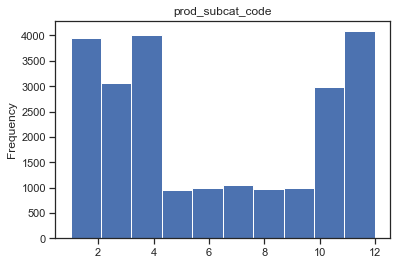

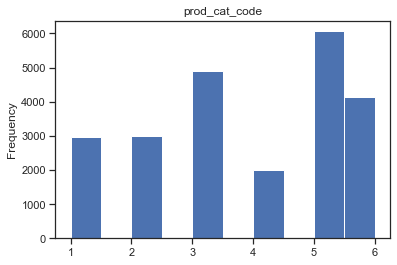

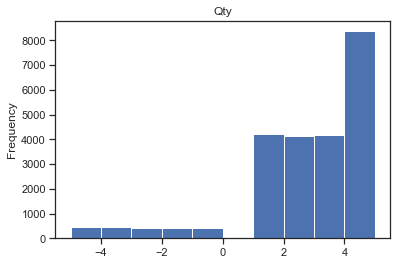

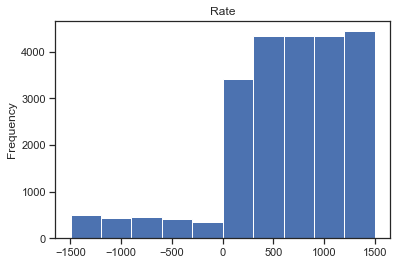

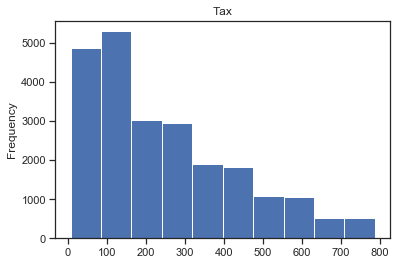

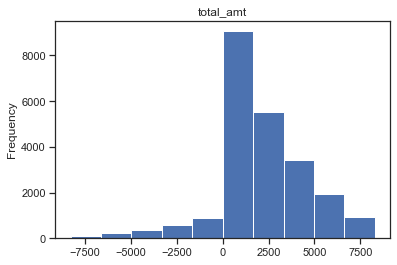

In [102]:
for var in  Continuos_variable.columns:
    Continuos_variable[var].plot(kind="hist")
    plt.title(var)
    plt.show()

#### Bar chart for Categorical Variables

In [104]:
Categorical_variables = Customer_Final.loc[:,Customer_Final.dtypes == "object"]
Categorical_variables

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


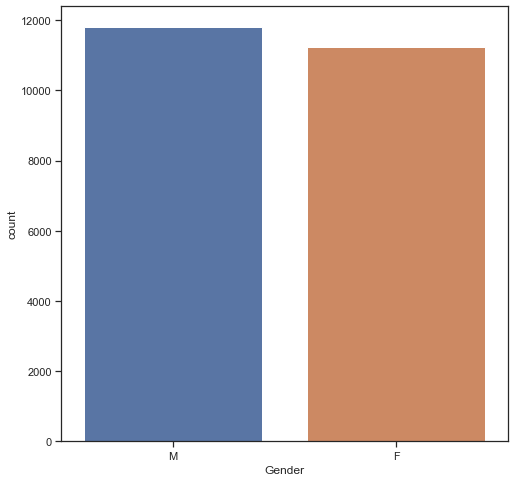

In [106]:
plt.figure(figsize=(8,8))
sns.countplot(Categorical_variables["Gender"])
plt.show()

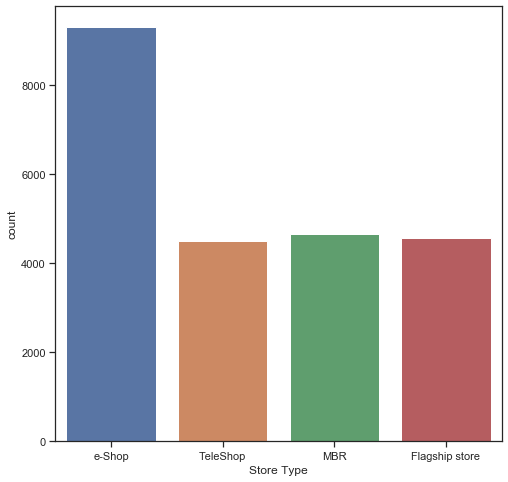

In [108]:
plt.figure(figsize=(8,8))
sns.countplot(Categorical_variables["Store_type"])
plt.xlabel("Store Type")
plt.show()

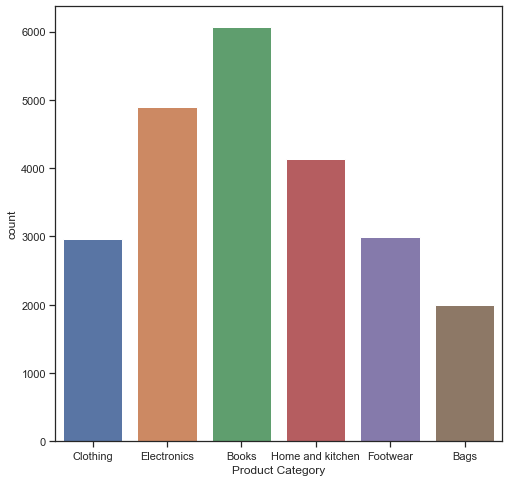

In [110]:
plt.figure(figsize=(8,8))
sns.countplot(Categorical_variables["prod_cat"])
plt.xlabel("Product Category")
plt.show()

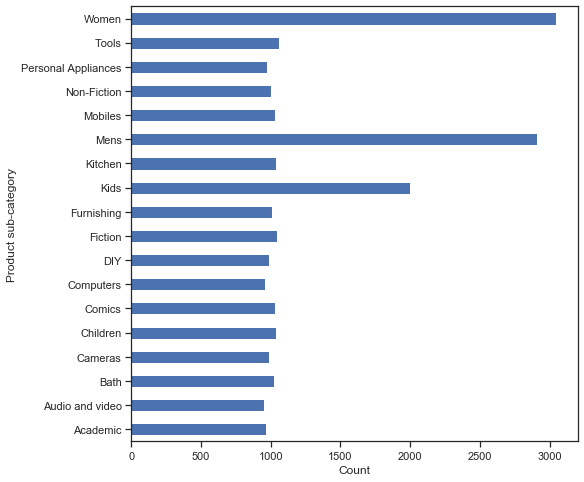

In [118]:
plt.figure(figsize=(8,8))
Categorical_variables.groupby("prod_subcat")["prod_subcat"].count().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Product sub-category")
plt.show()

### 4. Calculate the following information using the merged dataset :

#### a. Time period of the available transaction data




In [121]:
Customer_Final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [126]:
Start_date = Customer_Final["tran_date"].min()

In [127]:
End_date = Customer_Final["tran_date"].max()

In [131]:
print("Time period of the available transaction data is from " + pd.Timestamp.strftime(Start_date,format = "%d-%m-%Y") + " to " + pd.Timestamp.strftime(End_date,format = "%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


#### b. Count of transactions where the total amount of transaction was negative

In [133]:
#Count of transactions where the total amount of transaction was negative
negative_transaction = Customer_Final.loc[Customer_Final["total_amt"] < 0 , "transaction_id"].count()

In [135]:
print("Count of transactions where the total amount of transaction was negative is" , negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


### 5. Analyze which product categories are more popular among females vs male customers

In [144]:
#Groupby the dataset on the basis of "Gender" and "prod_cat"
Popular_products = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
Popular_products.pivot(index = "Gender",columns = "prod_cat",values = "Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


#### Products popular in Males are :
- Books
- Clothing
- Electronics
- Home and Kitchen
 
#### Products popular in Females are :
- Bags
- Footwear


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [149]:
Cust_Grp = Customer_Final.groupby(["city_code"])["customer_Id"].count().sort_values(ascending = False)
Cust_Grp

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

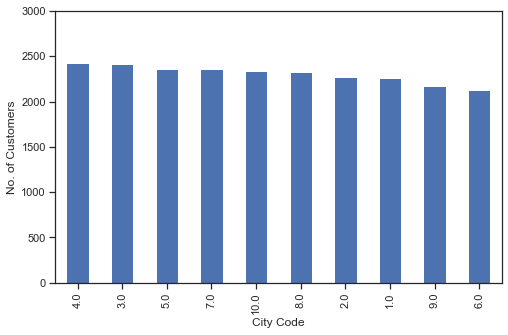

In [153]:
plt.figure(figsize = (8,5))
Cust_Grp.plot(kind = "bar")
plt.xlabel("City Code")
plt.ylabel("No. of Customers")
plt.yticks(np.arange(0 , 3500, step = 500))
plt.show()

In [156]:
Percentage = round((Cust_Grp[4.0]/Cust_Grp.sum()) * 100,2)
Percentage

10.52

In [158]:
print("City code 4.0 has the maximum customers and the percentage of customers from the city is ",Percentage)

City code 4.0 has the maximum customers and the percentage of customers from the city is  10.52


### 7. Which store type sells the maximum products by value and by quantity?

In [163]:
Customer_Final.groupby(["Store_type"])["Qty","Rate"].sum().sort_values(by="Qty",ascending = False)

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [165]:
print("e-Shop sells the maximum products by value and by quantity")

e-Shop sells the maximum products by value and by quantity


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [168]:
Store_group = round(Customer_Final.pivot_table(index = "prod_cat", columns = "Store_type", values = "total_amt",  aggfunc = "sum"),2)
Store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1617933.27
Books,2493677.81,2496039.20,2545714.47,5297161.15
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107969.82,1978457.19,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.37,3327977.12


In [173]:
#the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores
Total_amt = Store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()
print("the total amount earned from the Electronics and Clothing categories from Flagship Stores is ", Total_amt)

the total amount earned from the Electronics and Clothing categories from Flagship Stores is  3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [174]:
Gender_group = round(Customer_Final.pivot_table(index = "prod_cat", columns = "Gender", values = "total_amt",  aggfunc = "sum"),2)
Gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.21,3020200.37
Home and kitchen,4133702.23,4305169.51


In [179]:
Male_amt = Gender_group.loc["Electronics","M"].sum()
Male_amt

5711351.62

In [180]:
print("the total amount earned from Males the Electronics category is ", Male_amt)


the total amount earned from Males the Electronics category is  5711351.62


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [190]:
#Creating a Datafram that does not have negative Transactions of customers
Pos_Trans= Customer_Final.loc[Customer_Final["total_amt"]>0,:]
Pos_Trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [185]:
# Creating a dataframe that contains unique possitive transactions
Unique_Trans = Pos_Trans.groupby(["customer_Id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()
Unique_Trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [188]:
# Now finding the customers having unique transactions greater than 10
Unique_trans_count = Unique_Trans.groupby("customer_Id")["transaction_id"].count().reset_index()
Unique_trans_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [191]:
Unique_trans_count[Unique_trans_count["transaction_id"]>10]

,customer_Id,transaction_id


In [192]:
print("There are no unique transactions greater than 10")

There are no unique transactions greater than 10


### 11. For all customers aged between 25 - 35, find out:






#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [193]:
now = pd.Timestamp('now') 
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y') # 1 
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] - np.timedelta64(100, 'Y')) # 2 
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

#### as we have to deal with customers aged between 25-35, so creating new column 'Age_cat'

In [194]:
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [195]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,39.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,47.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,39.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,48.0,47-57
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,36.0,36-46
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,44.0,36-46
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,50.0,47-57


In [197]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat' 
Customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
Customer_25_35

Age_cat  prod_cat        
25-35    Bags                1421455.425
         Books               4454552.245
         Clothing            2435496.245
         Electronics         3962691.330
         Footwear            2280472.480
         Home and kitchen    3079226.150
36-46    Bags                2025946.780
         Books               6332366.040
         Clothing            2969373.680
         Electronics         4982822.910
         Footwear            2943925.530
         Home and kitchen    4123877.680
47-57    Bags                 678939.625
         Books               2045674.345
         Clothing             846267.565
         Electronics         1785191.590
         Footwear            1001506.805
         Home and kitchen    1241508.385
Name: total_amt, dtype: float64

In [199]:
Customer_25_35.loc["25-35" , ["Books" , "Electronics"]]

Age_cat  prod_cat   
25-35    Books          4454552.245
         Electronics    3962691.330
Name: total_amt, dtype: float64

In [201]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      Customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 8417243.58


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [203]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,39.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,47.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,39.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,48.0,47-57
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,36.0,36-46
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,44.0,36-46
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,50.0,47-57


In [205]:
# filtering out data that belongs to the 'age_cat' = 25-35 
Customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_cat']=='25-35']
Customer_total_amount_25_35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,31.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,28.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0,31.0,25-35
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,1992-11-24,M,9.0,27.0,25-35
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,Women,274306,1989-01-12,M,2.0,31.0,25-35
23042,49584040240,273010,2011-01-25,5,3,2,276,57.960,609.960,e-Shop,Electronics,Computers,273010,1985-08-06,F,4.0,35.0,25-35


In [208]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014? 
total_amount = Customer_total_amount_25_35[(Customer_total_amount_25_35['tran_date'] >='2014-01-01') & (Customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,31.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,28.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,30.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,29.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,28.0,25-35
1061,63635040022,268886,2014-01-01,3,2,5,652,342.300,3602.300,e-Shop,Footwear,Women,268886,1992-08-03,M,1.0,28.0,25-35


In [209]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is', total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 575803.345
